In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from exp_a4 import A4Factory
from exp_a23 import A23Factory
import numpy as np
from qiskit.tools.visualization import circuit_drawer
from scipy.linalg import expm
%matplotlib inline

In [2]:
def dec2bin(decimal_number):
    binlist = []
    for i in range(len(bin(decimal_number))-2):
        binlist.append(int(bin(decimal_number)[2+i]))
    return binlist

In [3]:
def permutation_control(qc, q_control_list, i):
    binlist = dec2bin(i)
    for j in range(len(binlist)):
        if binlist[j]==1:
            qc.x(q_control_list[len(binlist)-j-1])

In [4]:
# TODO: for sums with more than 2 elements need to change qr[n] by the right index
#quantum register for the matrix
n = 5
n_sum = 3
n_ancilla = 1

qr = QuantumRegister(n, 'qr')
qr_sum = QuantumRegister(n_sum, 'qrsum')
#ancilla qubits
qra = QuantumRegister(n_ancilla, 'ancilla')
cr = ClassicalRegister(n+n_sum+n_ancilla, 'classicalbit')
qc = QuantumCircuit(qr, qr_sum, qra, cr)
# TODO: substitute H by V
qc.h(qr_sum[0])

q_control_list = []
for i in range(n_sum):
    q_control_list.append(qr_sum[i])
    
# TODO: substitute by suitable exp(iH_jt)
for i in range(2**n_sum):
    permutation_control(qc, q_control_list, i)
    qc.barrier()
    permutation_control(qc, q_control_list, i)
    qc.barrier()
    
#1 controlled H_1 (here is exp_a4)
# A4Factory(n).build_controlled(qc, qr, qr_sum[0], qra, b_4*t)
#0 controlled H_2 (here is exp_a23)
# qc.x(qr_sum[0])
# A23Factory(n).build_controlled(qc, qr, qr_sum[0], qra, b_2*t)
# qc.x(qr_sum[0])

# TODO: substitute H by V^dagger
qc.h(qr_sum[0])

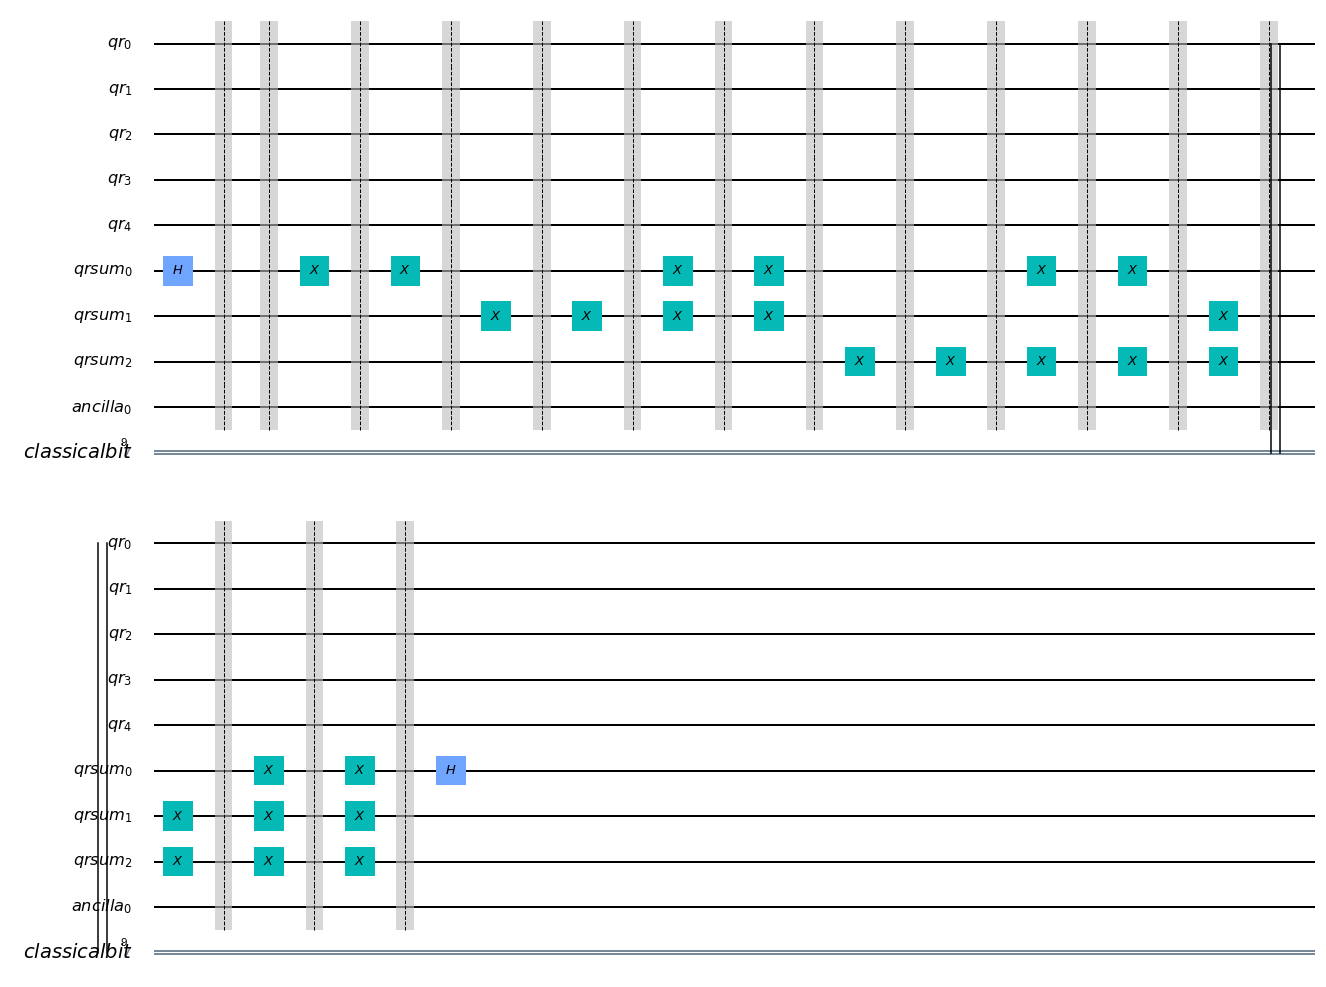

In [5]:
qc.draw()